In [1]:
# Segment 1: Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [2]:
# Segment 2: Load and preprocess data
# Define the path to your dataset
dataset_path = r""  # Your specified dataset path

# Load dataset and automatically create labels from folder names
BATCH_SIZE = 32
IMG_SIZE = (256, 256)

# Load dataset and split into training and testing
train_dataset = image_dataset_from_directory(
    dataset_path,
    label_mode="categorical",  # Automatically label based on folder name
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.2,  # Split into 80% train and 20% test
    subset="training"  # Use only training subset for now
)

test_dataset = image_dataset_from_directory(
    dataset_path,
    label_mode="categorical",  # Automatically label based on folder name
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.2,  # Split into 80% train and 20% test
    subset="validation"  # Use only validation subset for now
)

# Get class names from the directory structure
class_names = train_dataset.class_names  # This will give the correct class names


Found 8085 files belonging to 10 classes.
Using 6468 files for training.
Found 8085 files belonging to 10 classes.
Using 1617 files for validation.


Sample images from the training dataset:


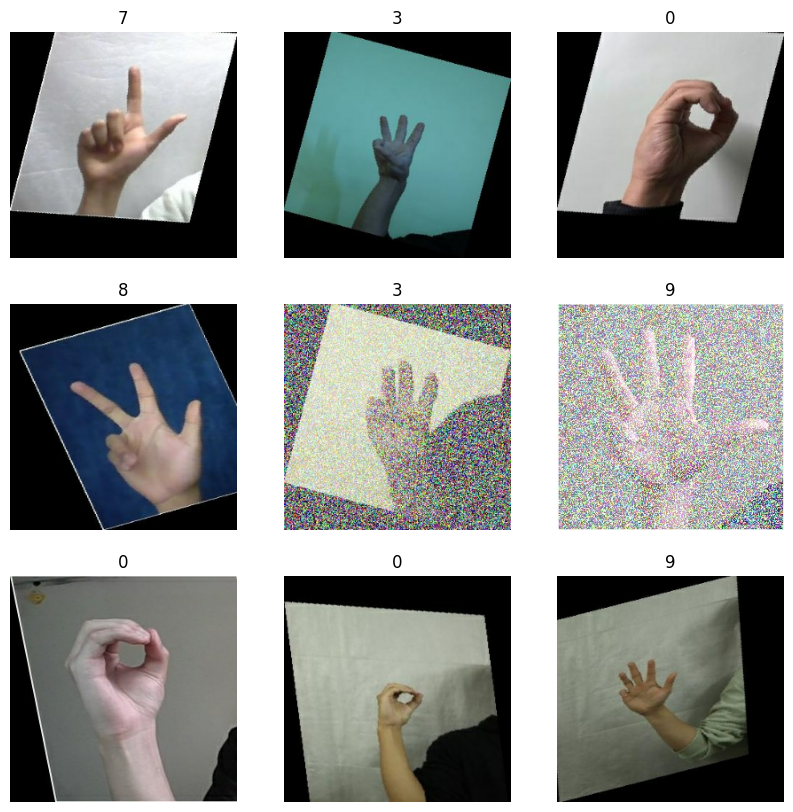

In [3]:
# Segment 4: Display sample images from training dataset with class labels
def display_sample_images_train(dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Get a single batch of images and labels
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[np.argmax(labels[i].numpy())])  # Show predicted class
            plt.axis("off")

# Display some sample images from the training dataset
print("Sample images from the training dataset:")
display_sample_images_train(train_dataset)


In [4]:
# Segment 5: Define the ResNet50 model
def ResNet50(input_shape=(256, 256, 3), classes=10):
    base_model = tf.keras.applications.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        pooling='avg'
    )
    
    base_model.trainable = True  # Fine-tune the base model
    
    # Create new model
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.Dropout(0.5)(x)  # Dropout layer
    outputs = layers.Dense(classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model


In [5]:
# Segment 6: Compile the model
# Initialize the model
model = ResNet50(input_shape=(256, 256, 3), classes=len(class_names))

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  # Smaller learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 47s 1us/step


In [8]:
# Segment 7: Execute Training with Epoch Progress
def train_model(model, train_dataset, validation_dataset, epochs=10):
    history = model.fit(
        train_dataset,
        validation_data=validation_dataset,
        epochs=epochs,
        verbose=1  # Display epoch progress
    )
    return history

# Train the model and store the history
history = train_model(model, train_dataset, test_dataset, epochs=10)

# Print completion message
print("Training completed.")


Epoch 1/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1375s 7s/step - accuracy: 0.9391 - loss: 0.2165 - val_accuracy: 0.9697 - val_loss: 0.0939
Epoch 2/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1374s 7s/step - accuracy: 0.9648 - loss: 0.1176 - val_accuracy: 0.9765 - val_loss: 0.0721
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1375s 7s/step - accuracy: 0.9821 - loss: 0.0630 - val_accuracy: 0.9765 - val_loss: 0.0652
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1376s 7s/step - accuracy: 0.9875 - loss: 0.0496 - val_accuracy: 0.9821 - val_loss: 0.0678
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1379s 7s/step - accuracy: 0.9938 - loss: 0.0311 - val_accuracy: 0.9802 - val_loss: 0.0577
Epoch 6/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1383s 7s/step - accuracy: 0.9954 - loss: 0.0208 - val_accuracy: 0.9839 - val_loss: 0.0433
Epoch 7/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1381s 7s/step - accuracy: 0.9939 - loss: 0.0257 - val_accuracy: 0.9839 - val_loss: 0.0437
Epoch 8/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1379s 7s/step - accuracy: 0.9957 - loss: 0.0182 - 

In [12]:
# Segment 8: Evaluate the model on the test dataset (previously called validation_dataset)
val_loss, val_accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {val_loss}, Test Accuracy: {val_accuracy}')


51/51 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9908 - loss: 0.0321
Test Loss: 0.042522408068180084, Test Accuracy: 0.9907235503196716


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

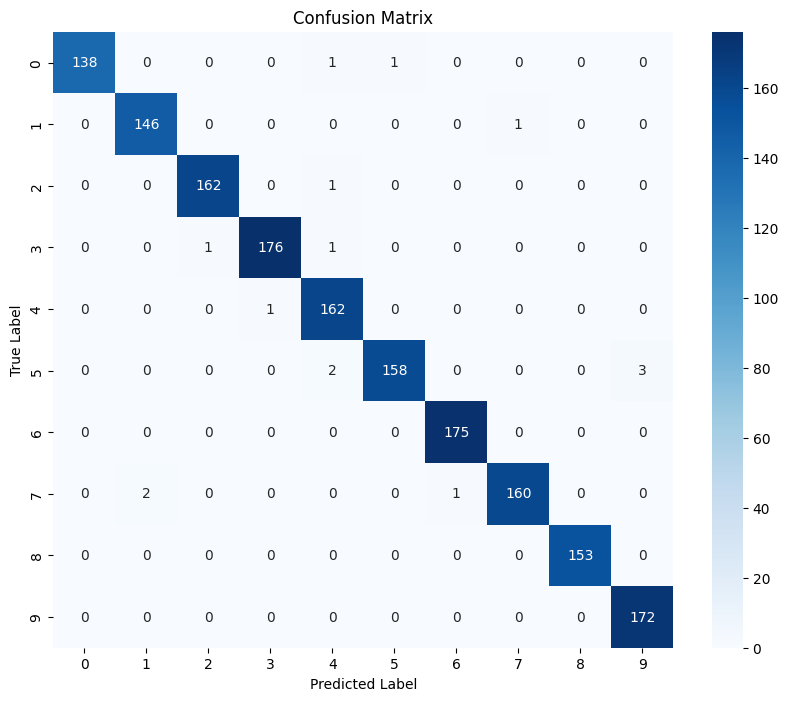

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       140
           1       0.99      0.99      0.99       147
           2       0.99      0.99      0.99       163
           3       0.99      0.99      0.99       178
           4       0.97      0.99      0.98       163
           5       0.99      0.97      0.98       163
           6       0.99      1.00      1.00       175
           7       0.99      0.98      0.99       163
           8       1.00      1.00      1.00       153
           9       0.98      1.00      0.99       172

    accuracy                           0.99      1617
   macro avg       0.99      0.99      0.99      1617
weighted avg       0.99      0.99      0.99      1617



In [13]:
# Segment 9: Confusion Matrix and Classification Report
# Generate predictions on the test dataset
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

y_true_classes = np.array(y_true)
y_pred_classes = np.array(y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))


In [14]:
# Display model summary after training
model.summary()

# Evaluate the model on the validation dataset (test_dataset)
val_loss, val_accuracy = model.evaluate(test_dataset)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,718,368 (269.77 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,110,166 (179.71 MB)

51/51 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9910 - loss: 0.0353
Validation Loss: 0.042522404342889786, Validation Accuracy: 0.9907235503196716


In [16]:
# Evaluate the model on the test dataset
val_loss, val_accuracy = model.evaluate(test_dataset)  # Use test_dataset instead of validation_dataset
final_accuracy_percentage = val_accuracy * 100  # Convert to percentage
print(f'Final Validation Loss: {val_loss:.4f}, Final Validation Accuracy: {final_accuracy_percentage:.2f}%')


51/51 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9905 - loss: 0.0358
Final Validation Loss: 0.0425, Final Validation Accuracy: 99.07%


In [18]:
# Save the model as HDF5
model_save_path = r"C:\Users\Rohan\Desktop\NSL jupyter\saved_model\resnet50_model.h5"  # Specify your path with .h5
model.save(model_save_path)
print(f"Model saved as: {model_save_path}")


Model saved as: C:\Users\Rohan\Desktop\NSL jupyter\saved_model\resnet50_model.h5


In [19]:
# Save the model in Keras format
model_save_path = r"C:\Users\Rohan\Desktop\NSL jupyter\saved_model\resnet50_model.keras"  # Specify your path with .keras
model.save(model_save_path)
print(f"Model saved as: {model_save_path}")


Model saved as: C:\Users\Rohan\Desktop\NSL jupyter\saved_model\resnet50_model.keras


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

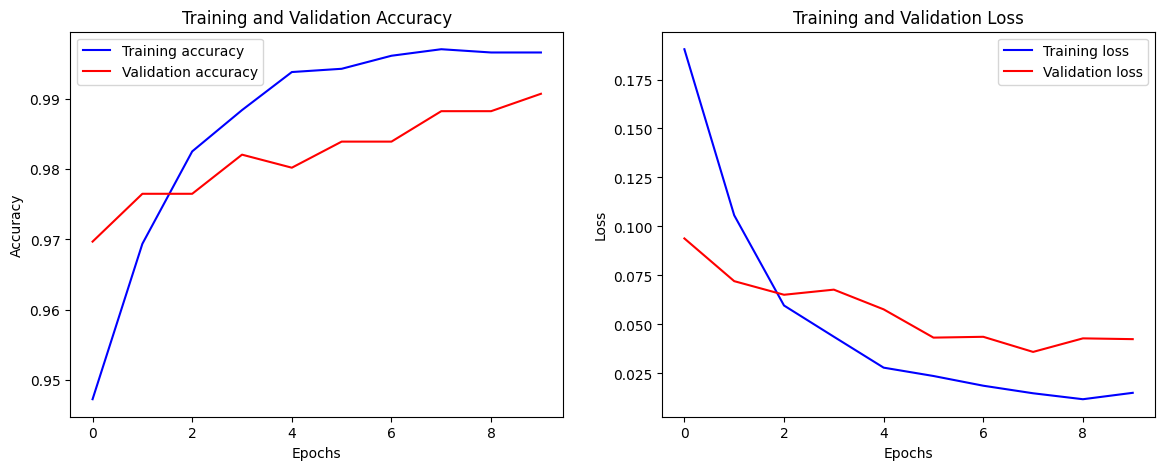

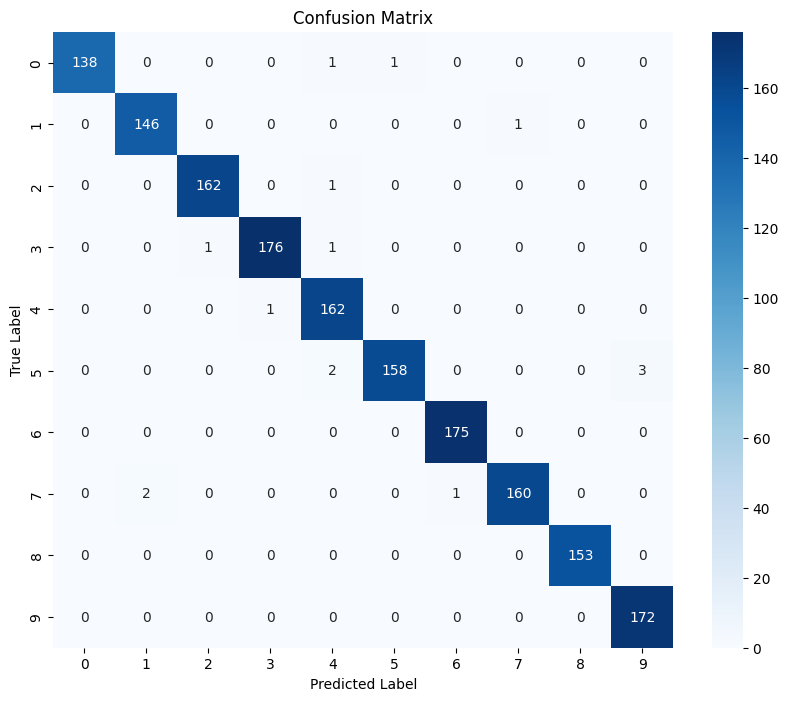

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       140
           1       0.99      0.99      0.99       147
           2       0.99      0.99      0.99       163
           3       0.99      0.99      0.99       178
           4       0.97      0.99      0.98       163
           5       0.99      0.97      0.98       163
           6       0.99      1.00      1.00       175
           7       0.99      0.98      0.99       163
           8       1.00      1.00      1.00       153
           9       0.98      1.00      0.99       172

    accuracy                           0.99      1617
   macro avg       0.99      0.99      0.99      1617
weighted avg       0.99      0.99      0.99      1617



In [20]:
# Segment 11: Visualize Training History and Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def plot_training_history(history):
    """Plot training and validation accuracy and loss over epochs."""
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def plot_confusion_matrix(y_true_classes, y_pred_classes, class_names):
    """Plot confusion matrix using Seaborn heatmap."""
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

# After training and evaluating the model, call the plotting functions
# Generate predictions on the test dataset
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Convert to numpy arrays
y_true_classes = np.array(y_true)
y_pred_classes = np.array(y_pred)

# Call the plotting functions
plot_training_history(history)  # Plot the training history
plot_confusion_matrix(y_true_classes, y_pred_classes, class_names)  # Plot the confusion matrix

# Print the classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))
